In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [58]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
df.describe()
#Pclass is negatively skewed.
#Age and Fare are positively skewed.
#Survived is our target and it is normally distributed but since it is categorical we will do countplot.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
df.info()
#There are 12 columns -> 5 object, 5 int, 2 float
#There are missing values in 3 columns -> Age(197 missing), Cabin(687 missing), Embarked(2 missing).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Logistic Regression ->                                                             
It uses S shaped curve.                                     
It is used for predicting the probability of a binary outcome based on one or more predictor values(features).           
S = 1/1+e^-(mx+c) ≈ 1/1+e^-y.                                                        
Because it is based on a probability the ouput will be between 0 and 1.                                                         
In logistic regression the probability of the positive class and the negative class by using a threshold of 0.5.           
Its a fundamental tool for binary classification problems.                                     

# Preprocessing

In [61]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
(df.isna().sum()/len(df))*100
#percentage of missing values -> Age = 19%, Cabin = 77%, Embarked = 0.2%
#Since cabin has 77% missing values i will drop the column

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

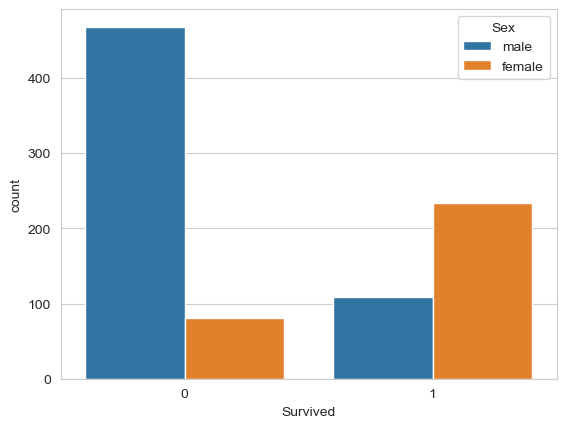

In [63]:
sns.countplot(data=df,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

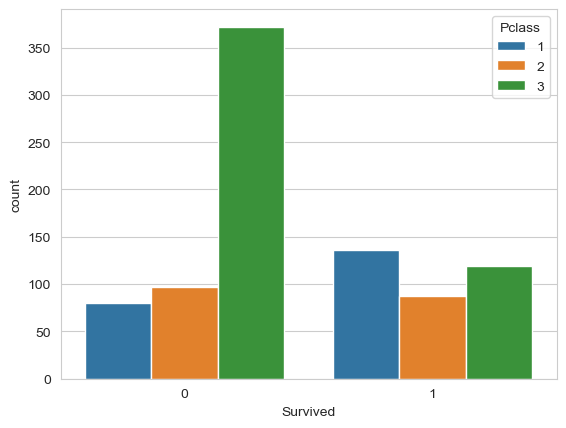

In [64]:
sns.countplot(data=df,x='Survived',hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

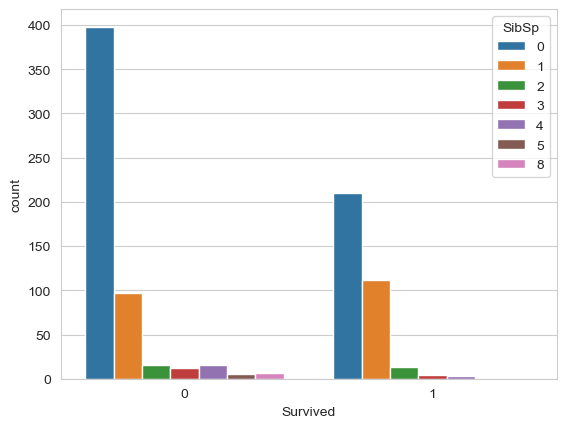

In [65]:
sns.countplot(data=df,x='Survived',hue='SibSp')

<Axes: xlabel='Survived', ylabel='count'>

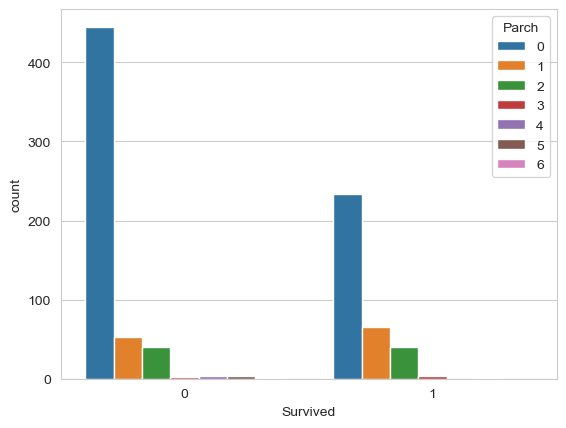

In [66]:
sns.countplot(data=df,x='Survived',hue='Parch')

<Axes: xlabel='Fare', ylabel='Density'>

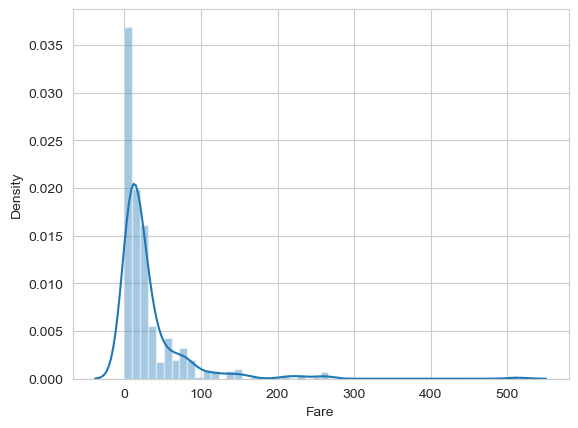

In [67]:
sns.distplot(df['Fare'])

<Axes: xlabel='Age', ylabel='Density'>

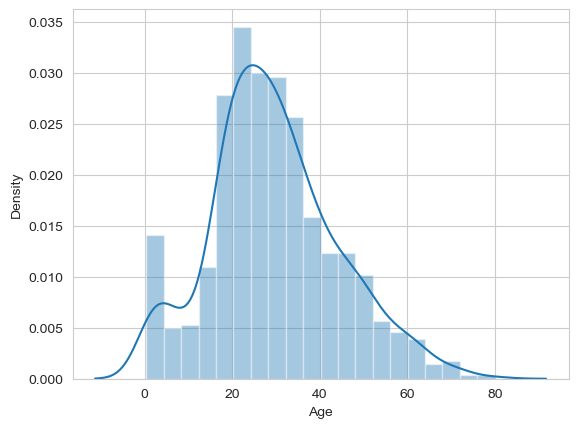

In [68]:
sns.distplot(df['Age'])

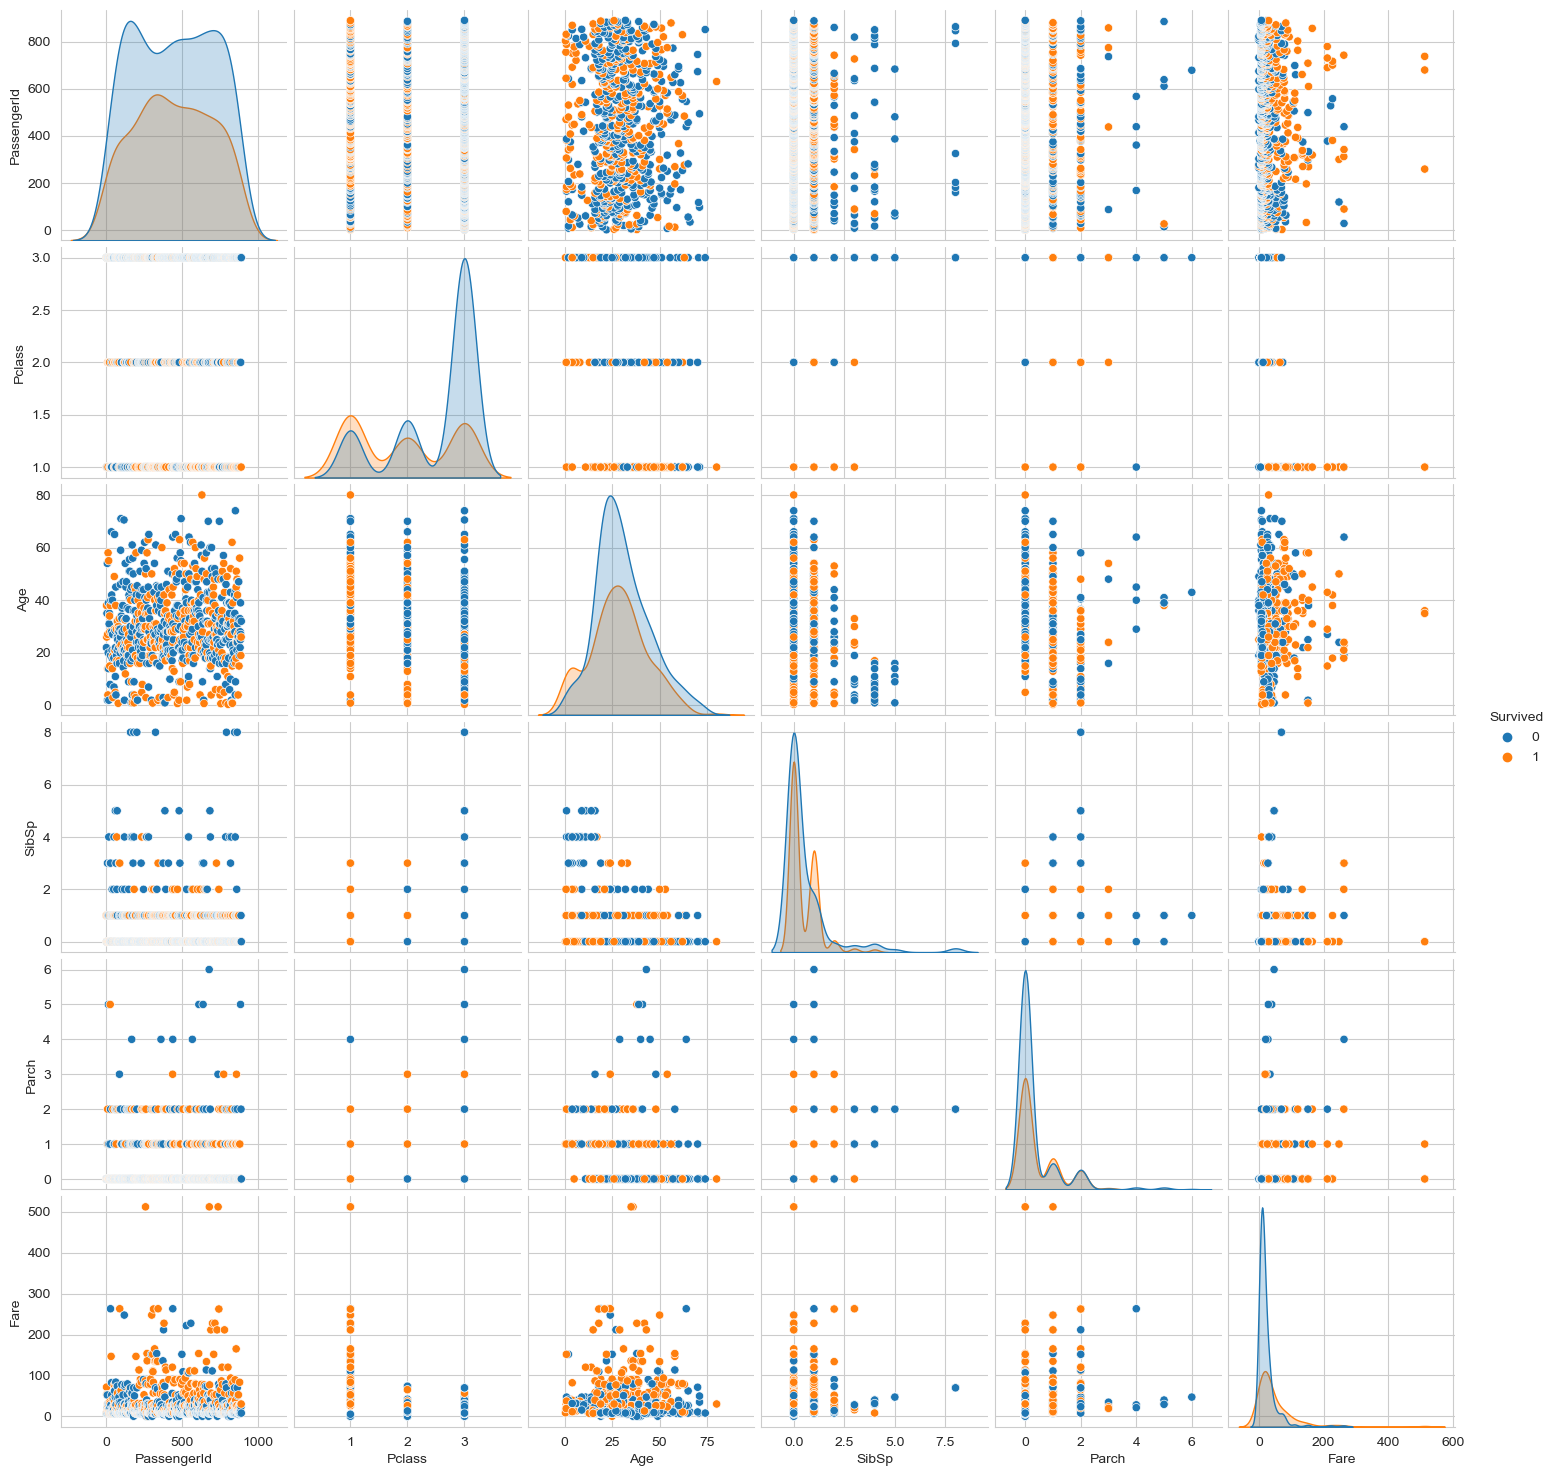

In [69]:
sns.pairplot(df,hue="Survived")

In [70]:
df.drop("Cabin",axis=1,inplace=True)

In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Since age has 19% missing values we'll do data imputation on it.

<Axes: ylabel='Age'>

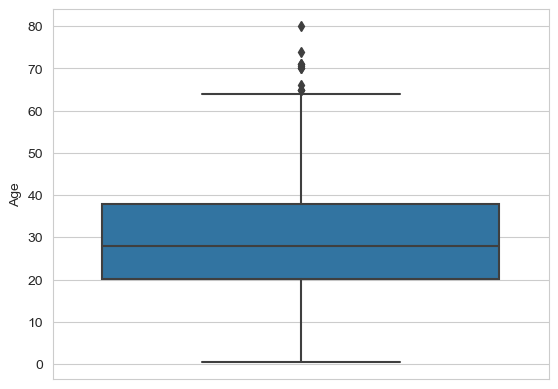

In [72]:
sns.boxplot(data=df,y='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

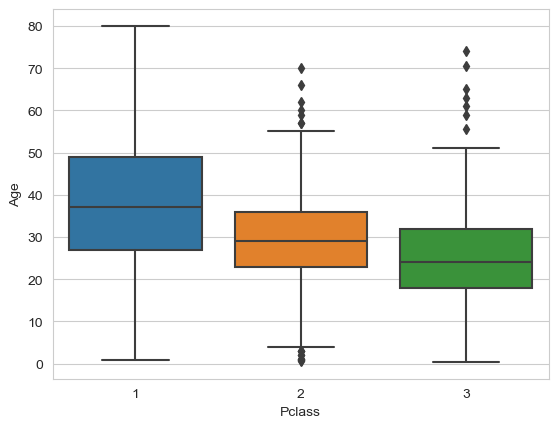

In [73]:
sns.set_style("whitegrid")
sns.boxplot(data=df,y="Age",x="Pclass")
#Pclass 1 - median = 37
#Pclass 2 - median = 30
#Pclass 3 - median = 25

In [74]:
def f(cols):
    a=cols[0]
    pc=cols[1]
    if(pd.isnull(a)):
        if pc==1:
            return 37
        elif pc==2:
            return 30
        else:
            return 25
    else:
        return a

In [75]:
df["Age"] = df[["Age","Pclass"]].apply(f,axis=1)
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [76]:
df["Age"].isna().sum()

0

<Axes: xlabel='Pclass', ylabel='Age'>

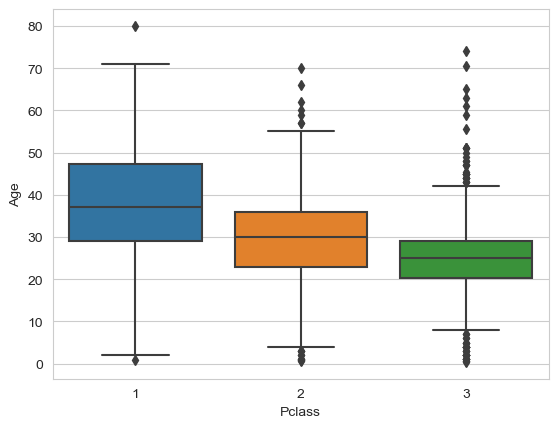

In [77]:
sns.set_style("whitegrid")
sns.boxplot(data=df,y="Age",x="Pclass")

In [78]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [79]:
df.dropna(inplace=True)

In [80]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [82]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [83]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [84]:
features=df.iloc[:,1:]
target=df.iloc[:,0]

In [85]:
features.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S


In [86]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [87]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


In [88]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
features[["Sex","Embarked"]]=oe.fit_transform(features[["Sex","Embarked"]])

In [89]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    float64
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 55.6 KB


In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size=0.3,random_state=1)

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)

print(f"Accuracy: {ac}\n{cm}\n{cr}")

Accuracy: 0.8352059925093633
[[144  22]
 [ 22  79]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       166
           1       0.78      0.78      0.78       101

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267



Confusion Matrix ->                              
It is used to describe the performance of a classification model for which the true values are known.                
[[144(TP)  22(FN)]                     
 [ 22(FP)  79(TN)]]                      
                                                           
      Predicted                                                           
Actual            TP     FN                                                                                    
                  FP     TN                                   
                                            
Precision=TP/TP+FP                
Recall = TP/TP+FN                                           
                                               
TP ->True Positive.                                                                                
TN ->True Negative.                                            
FP ->False Positive.                                           
FN ->False Negative.                                              
                                                  
True Positive: The cases where the model correctly predicts positive class.                   
True Negative: Here the model correctly predicts negative class.                               
False Positive: It is also known as Type-1 error, these are the cases where the model incorrectly predicts the positive class when it is actually negative.                                 
False Negative: It is also known as Type-2 error, here the model incorrectly predicts the negative class when it is actually positive.                             
From the confusion matrix , we can get several performance matrix like accuracy where,                                       
Accuracy = TP+TN/TP+FN+FP+TN                                    
                                     
Precision: It is the proportion of correctly classified positive instances to the total number of instances predicted as positive.             
Precision=TP/TP+FP                                      
                                     
Recall(Sensitivity): It is the proportion of correctly classified positive instances to the total number of actual positive instances.                                                           
Recall = TP/TP+FN                          
                                           
Specificity: It is the proportion of correctly classified negative instances(values) to the total number of actual negative instances.                                 
Specificity = TN/TN+FP                                                 
                                    
F1-score: The harmonic mean of precision and recall is F1-score.                       
F1-score = 2xPxR/P+R                          

# Decision Tree

Decision Tree creates multiple decision boundaries or hyperplain based on multiple features in order to classify data without impurities.                                  
To calculate the purity in decision tree two criterias are used -                                    
1. Gini Index.                                   
2. Entropy.                                                   
                                                                    
Gini Index = 1-p²-q²                                         
                                                                              
Entropy = -plog(p)-qlog(q)                                                                 
                                                      
Information Gain when dividing decision tree by gender.                                      
IG = Total no of males/total people x Impurities calculated + Total no of females/total people x Impurities calculated         
IG = 6/12 x 0 + 6/12 x 4/9 = 2/9.                                                                                
                                                                  
Information Gain when dividing decision tree by age.                                                    
IG = Total no of dislikes/Total data x impurities + Total no of likes/Total data x impurities.                                 
IG = 4/12 x 1/2 + 8/12 x 3/8 = 10/24.                                            
                                                             
There are chances of overfitting of data so we apply pruning techniques.                                                                                    
                                                            
                                                                  

# SVM

Support vectors are the co-ordinates or data points that are close to hyper plane which are used to create boundary lines.
Hyper Plane is a decision boundary that separates two classes.
In SVM, there are lines other than the hyper planes which helps to create error margin.
The support vectors can be on the boundary lines or outside it.
The kernal function maps lower dimensional data into higher dimensional subspace.
For eg. - The hyper plane in three dimension is a plane and two dimension is a line and in one dimension is a point.
SVM is a supervised machine learning algorithm that is used for classification and regression tasks.
It works by finding the hyper plane that best separates different classes in the feature space.
It assumes the linear separability of data points into different classes.
It defines the hyper plane that maximise the margin which is the distance between hyper plane and the nearest data points from each class.
This hyper plane is called the Maximum Margin Hyper Plane.

Support Vectors -> The data points that lie closest to the hyper plane are called support vectors. These support vectors are crucial in determining the location of the hyper plane.

Kernel Trick -> SVM handles non linearly separable data by mapping the original feature space into higher dimensional space using kernel functions. This allows SVM to find hyper plane in the transformed space that separates data points. We have different kernel functions like -

1.Linear.                                                                  
2.Polynomial.                                                                        
3.Radial Basis Function (RBF).                                                                   
4.Sygmoid kernels.                                                                             
These kernel functions determine the shape of decision boundary in the tranformed feature space.

In [93]:
from sklearn.svm import SVC

In [94]:
svm = SVC()

In [95]:
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [96]:
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)

print(f"Accuracy: {ac}\n{cm}\n{cr}")

Accuracy: 0.6853932584269663
[[145  21]
 [ 63  38]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       166
           1       0.64      0.38      0.47       101

    accuracy                           0.69       267
   macro avg       0.67      0.62      0.63       267
weighted avg       0.68      0.69      0.66       267



SVM deals with higher dimension and map lower dimension data into higher dimension so we need to standardize our data in order to bring all the data points into one scale.

In [97]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain_s = ss.fit_transform(xtrain)
xtest_s = ss.transform(xtest)

In [98]:
svm = SVC()
svm.fit(xtrain_s,ytrain)
ypred=svm.predict(xtest_s)

In [99]:
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)

print(f"Accuracy: {ac}\n{cm}\n{cr}")

Accuracy: 0.8426966292134831
[[150  16]
 [ 26  75]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       166
           1       0.82      0.74      0.78       101

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267

